In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the dataset 
dFrame = pd.read_csv("Diabeties.csv") #in local i have convertied file into csv as it was in xls format
dFrame.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,Yes
1,1.0,NaN,66.0,29.0,0.0,990.6,NaN,114.0,NO
2,8.0,NaN,64.0,0.0,NaN,NaN,0.672,32.0,Yes
3,NaN,NaN,66.0,23.0,94.0,28.1,0.167,NaN,NO
4,0.0,NaN,40.0,35.0,168.0,43.1,2.288,33.0,Yes


In [4]:
#copy the dataset 
df = dFrame.copy()

In [5]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,Yes
1,1.0,NaN,66.0,29.0,0.0,990.6,NaN,114.0,NO
2,8.0,NaN,64.0,0.0,NaN,NaN,0.672,32.0,Yes
3,NaN,NaN,66.0,23.0,94.0,28.1,0.167,NaN,NO
4,0.0,NaN,40.0,35.0,168.0,43.1,2.288,33.0,Yes


In [6]:
print(df.shape)
print("*"* 30)
print(df.info())

(499, 9)
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               488 non-null    float64
 1   Glucose                   491 non-null    float64
 2   BloodPressure             478 non-null    float64
 3   SkinThickness             483 non-null    float64
 4   Insulin                   492 non-null    float64
 5   BMI                       493 non-null    float64
 6   DiabetesPedigreeFunction  486 non-null    float64
 7   Age                       495 non-null    float64
 8   Outcome                   499 non-null    object 
dtypes: float64(8), object(1)
memory usage: 35.2+ KB
None


In [7]:
#summary statistics for numerical columns
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,488.000000,491.000000,478.000000,483.000000,492.000000,493.000000,486.000000,495.000000
mean,3.811475,175.798371,68.654812,40.453416,109.514228,80.859635,0.501676,83.034343
std,3.357744,321.688590,19.385099,126.489972,477.856865,182.212195,0.362098,202.178712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.700000,0.237000,24.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,33.300000,0.403500,30.000000
75%,6.000000,146.000000,80.000000,35.000000,122.750000,42.000000,0.676250,44.000000
max,17.000000,4499.000000,122.000000,990.000000,9905.000000,990.800000,2.420000,990.000000


In [8]:
#checking null values for each column
df.isnull().sum()

Pregnancies                 11
Glucose                      8
BloodPressure               21
SkinThickness               16
Insulin                      7
BMI                          6
DiabetesPedigreeFunction    13
Age                          4
Outcome                      0
dtype: int64

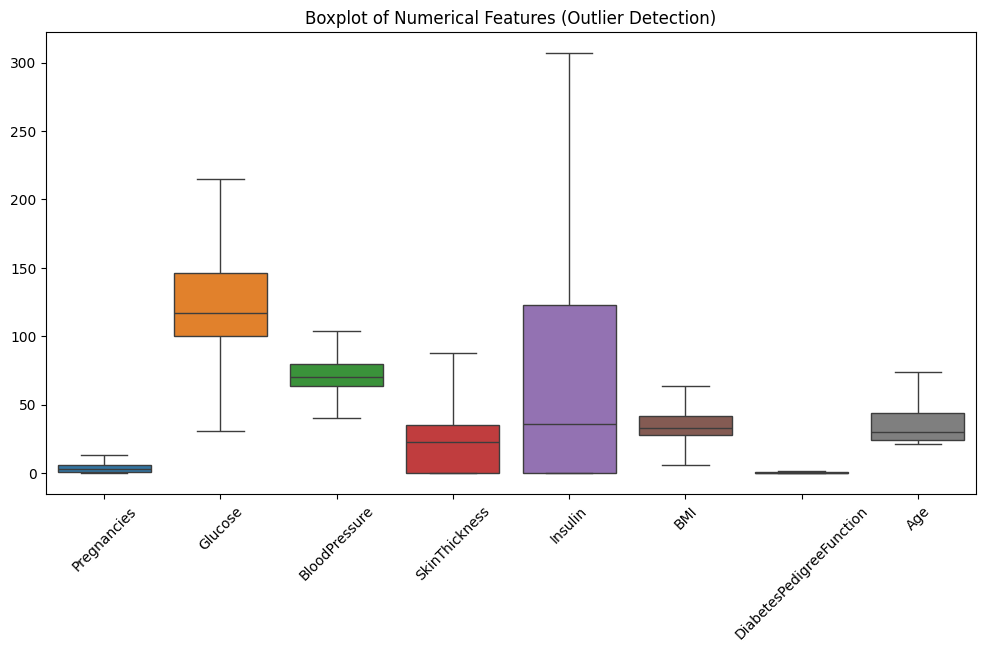

In [11]:
#Obseveed extream outler so creating a Boxplots for visual representaion 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features (Outlier Detection)")
plt.show()

In [10]:
# Observer oulier with extrem values and Handling  using IQR 
for col in df.select_dtypes(include=['number']).columns:  # Only numeric columns
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Apply IQR-based capping for most features
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])



In [13]:
df.describe()
#now if we check the boxplot again we get normal boxplot diagram

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,488.000000,491.000000,478.000000,483.000000,492.000000,493.000000,486.000000,495.000000
mean,3.799180,124.812627,70.550209,23.628364,73.095020,36.699594,0.488367,37.290909
std,3.317343,36.062722,13.257986,21.541841,93.498761,13.425096,0.314018,16.508746
min,0.000000,31.000000,40.000000,0.000000,0.000000,6.250000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.700000,0.237000,24.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,33.300000,0.403500,30.000000
75%,6.000000,146.000000,80.000000,35.000000,122.750000,42.000000,0.676250,44.000000
max,13.500000,215.000000,104.000000,87.500000,306.875000,63.450000,1.335125,74.000000


In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.60,0.627000,50.0,Yes
1,1.0,NaN,66.0,29.0,0.0,63.45,NaN,74.0,NO
2,8.0,NaN,64.0,0.0,NaN,NaN,0.672000,32.0,Yes
3,NaN,NaN,66.0,23.0,94.0,28.10,0.167000,NaN,NO
4,0.0,NaN,40.0,35.0,168.0,43.10,1.335125,33.0,Yes


In [15]:
# Fill missing values only for numeric columns using median as the column Outcome has 0 missing values and note a object dtype 
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.60,0.627000,50.0,Yes
1,1.0,117.0,66.0,29.0,0.0,63.45,0.403500,74.0,NO
2,8.0,117.0,64.0,0.0,36.0,33.30,0.672000,32.0,Yes
3,3.0,117.0,66.0,23.0,94.0,28.10,0.167000,30.0,NO
4,0.0,117.0,40.0,35.0,168.0,43.10,1.335125,33.0,Yes


In [17]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

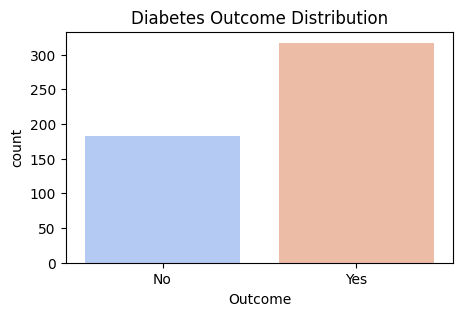

In [128]:
# visual for outcome() count for yes or no )
plt.figure(figsize=(5, 3))
sns.countplot(x="Outcome", hue="Outcome", data=df, palette="coolwarm")
plt.title("Diabetes Outcome Distribution")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.legend([], [], frameon=False)  # Remove the legend
plt.show()

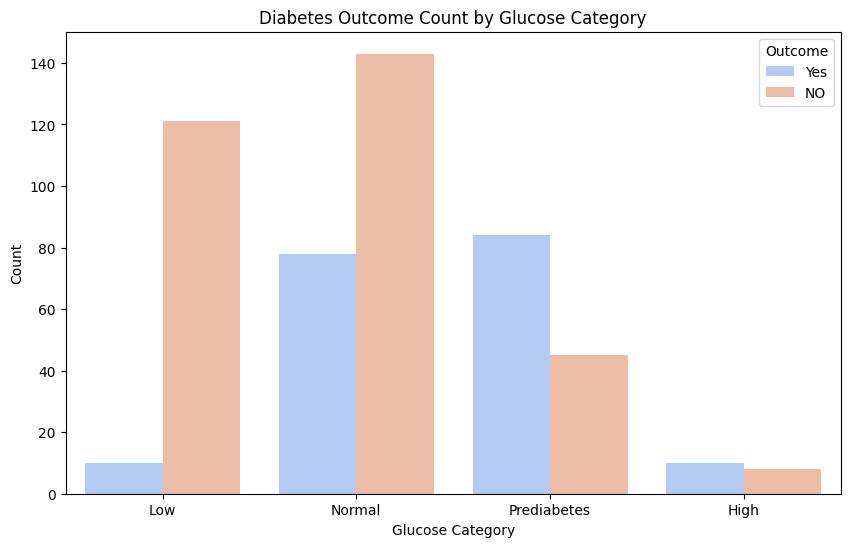

In [143]:
# Categorize Glucose into different ranges
df['Glucose_Category'] = pd.cut(df['Glucose'], bins=[0, 100, 140, 200, 300], labels=["Low", "Normal", "Prediabetes", "High"])

# Countplot of Diabetes Outcome by Glucose Category
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Glucose_Category", hue="Outcome", palette="coolwarm")
plt.title("Diabetes Outcome Count by Glucose Category")
plt.xlabel("Glucose Category")
plt.ylabel("Count")
plt.show()

#higer glucose levels shows high chance of diabetes


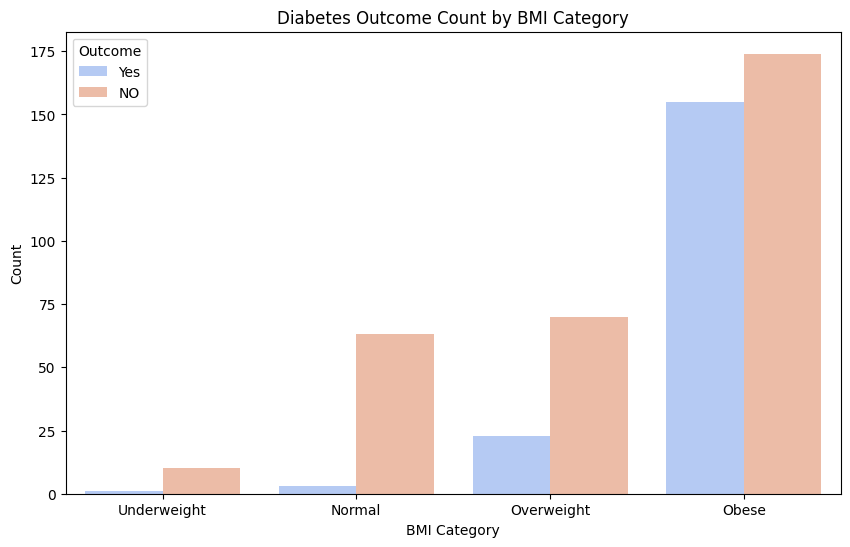

In [ ]:
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=["Underweight", "Normal", "Overweight", "Obese"])

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="BMI_Category", hue="Outcome", palette="coolwarm")
plt.title("Diabetes Outcome Count by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.show()

#Overweight individuals higher BMI are more likely to have diabetes.")


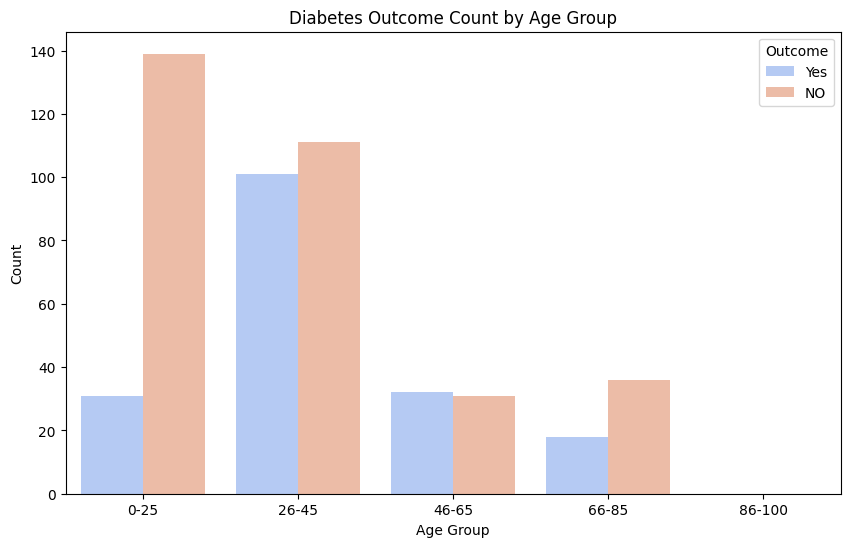

In [ ]:

df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 45, 65, 85, 100], labels=["0-25", "26-45", "46-65", "66-85", "86-100"])

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Age_Group", hue="Outcome", palette="coolwarm")
plt.title("Diabetes Outcome Count by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()


#Age Factor: Older individuals tend to have a higher risk


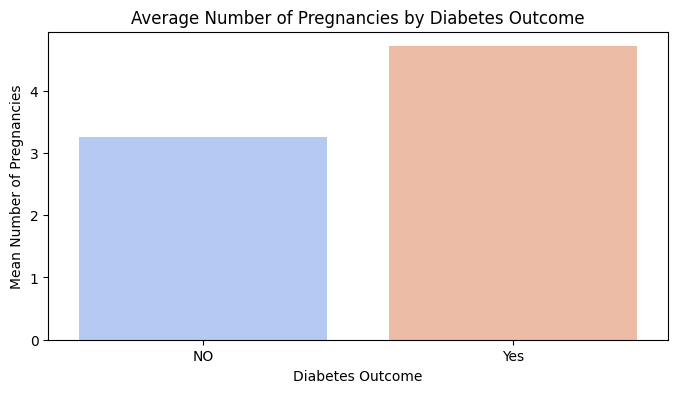

In [ ]:
pregnancy_counts = df.groupby("Outcome")["Pregnancies"].count().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(data=pregnancy_means, x="Outcome", y="Pregnancies", hue="Outcome", palette="coolwarm")
plt.title("Average Number of Pregnancies by Diabetes Outcome")
plt.ylabel("Mean Number of Pregnancies")
plt.xlabel("Diabetes Outcome")
plt.show()
# Women with more pregnancies have a slightly higher risk
